<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 171.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 157.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 136.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 148.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 133.1 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-05-23 20:17:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.0MB/s    in 2.3s    

2025-05-23 20:17:49 (66.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Under 18 years old'),
  Text(1, 0, '18-24 years old'),
  Text(2, 0, '25-34 years old'),
  Text(3, 0, '35-44 years old'),
  Text(4, 0, '45-54 years old'),
  Text(5, 0, '55-64 years old'),
  Text(6, 0, '65 years or older'),
  Text(7, 0, 'Prefer not to say')])

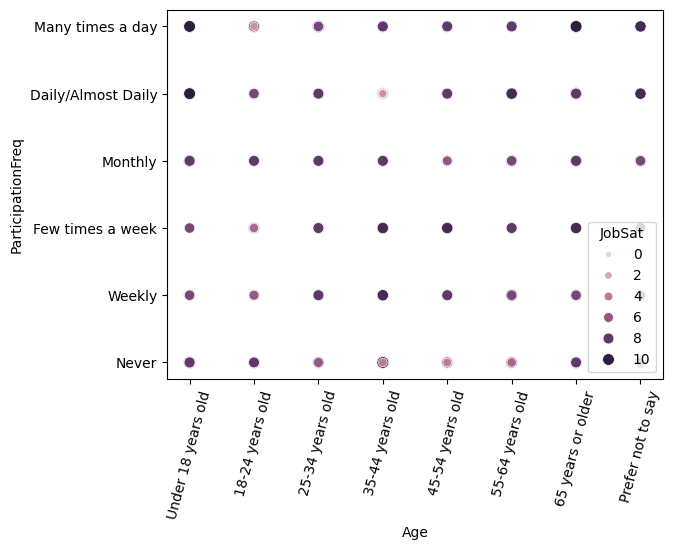

In [3]:
##Write your code here
ParticipationMap={
'Less than once per month or monthly'                   : 'Monthly',
'I have never participated in Q&A on Stack Overflow'    : 'Never',
'A few times per month or weekly'                       : 'Weekly',
'A few times per week'                                  : 'Few times a week',
'Daily or almost daily'                                 : 'Daily/Almost Daily',
'Multiple times per day'                                : 'Many times a day'
}
df['ParticipationFreq']=df['SOPartFreq'].map(ParticipationMap)
from pandas.api.types import CategoricalDtype
AgeLabels = ['Under 18 years old','18-24 years old', '25-34 years old','35-44 years old','45-54 years old',
             '55-64 years old','65 years or older','Prefer not to say']
Age_ordered = CategoricalDtype(categories = AgeLabels, ordered = True)
df['Age'] = df['Age'].astype(Age_ordered)
sns.scatterplot(data=df,x='Age',y='ParticipationFreq',size='JobSat',hue='JobSat')
plt.xticks(rotation=75)

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


<Axes: xlabel='JobSat', ylabel='ConvertedCompYearly'>

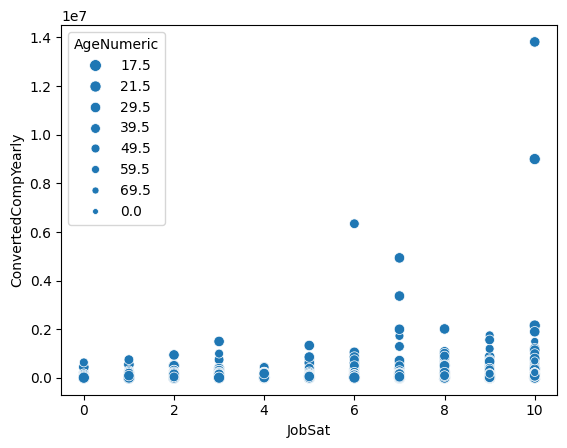

In [4]:
##Write your code here
AgeMap = {'Under 18 years old':17.5,
              '18-24 years old':21.5, 
              '25-34 years old':29.5,
              '35-44 years old':39.5,
              '45-54 years old':49.5,
              '55-64 years old':59.5,
              '65 years or older':69.5,
              'Prefer not to say':0}
df['AgeNumeric'] = df['Age'].map(AgeMap)
sns.scatterplot(data=df,x='JobSat',y='ConvertedCompYearly',size='AgeNumeric')

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Bash/Shell (all shells)'),
  Text(1, 0, 'Go'),
  Text(2, 0, 'HTML/CSS'),
  Text(3, 0, 'Java'),
  Text(4, 0, 'JavaScript'),
  Text(5, 0, 'Python'),
  Text(6, 0, 'TypeScript'),
  Text(7, 0, 'C#'),
  Text(8, 0, 'C'),
  Text(9, 0, 'C++'),
  Text(10, 0, 'PHP'),
  Text(11, 0, 'PowerShell'),
  Text(12, 0, 'SQL'),
  Text(13, 0, 'Lua'),
  Text(14, 0, 'Rust'),
  Text(15, 0, 'Swift'),
  Text(16, 0, 'R'),
  Text(17, 0, 'Ruby'),
  Text(18, 0, 'Delphi'),
  Text(19, 0, 'VBA'),
  Text(20, 0, 'Visual Basic (.Net)'),
  Text(21, 0, 'F#'),
  Text(22, 0, 'Clojure'),
  Text(23, 0, 'Scala'),
  Text(24, 0, 'Perl'),
  Text(25, 0, 'MATLAB'),
  Text(26, 0, 'OCaml'),
  Text(27, 0, 'Assembly'),
  Text(28, 0, 'Dart'),
  T

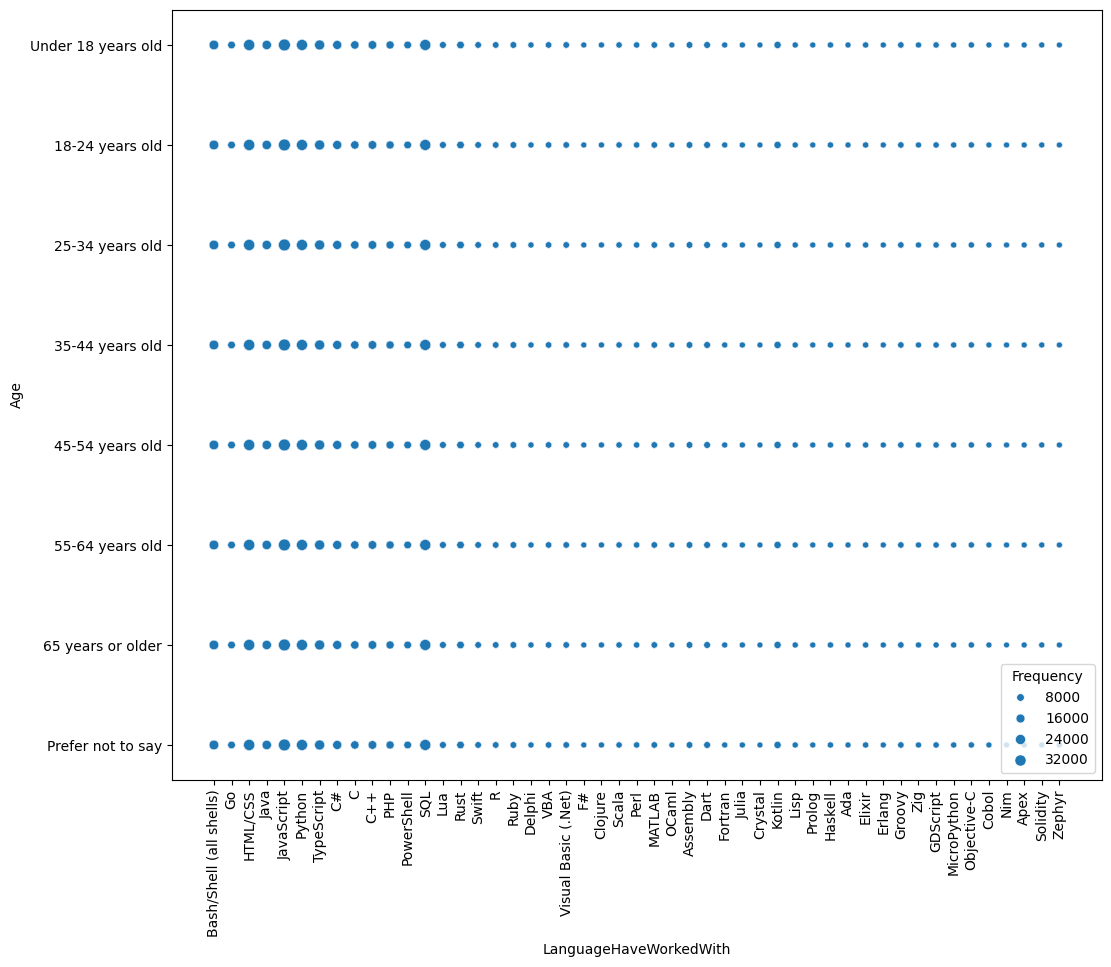

In [5]:
##Write your code here
df_languages=df[['LanguageHaveWorkedWith','Age']].copy()
df_languages['LanguageHaveWorkedWith']=df_languages['LanguageHaveWorkedWith'].str.split(';')
df_exploded=df_languages.explode('LanguageHaveWorkedWith')
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()
language_counts = df_exploded['LanguageHaveWorkedWith'].value_counts().rename('Frequency').reset_index()
language_counts.rename(columns={'index': 'LanguageHaveWorkedWith'}, inplace=True)
df_merged = pd.merge(df_exploded, language_counts, on='LanguageHaveWorkedWith', how='left')
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_merged,x='LanguageHaveWorkedWith',y='Age',size='Frequency')
plt.xticks(rotation=90)

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'Elasticsearch'),
  Text(1, 0, 'MongoDB'),
  Text(2, 0, 'PostgreSQL'),
  Text(3, 0, 'SQLite'),
  Text(4, 0, 'MySQL'),
  Text(5, 0, 'Microsoft SQL Server'),
  Text(6, 0, 'Redis'),
  Text(7, 0, 'Presto'),
  Text(8, 0, 'Dynamodb'),
  Text(9, 0, 'DuckDB'),
  Text(10, 0, 'Cassandra'),
  Text(11, 0, 'Clickhouse'),
  Text(12, 0, 'Cloud Firestore'),
  Text(13, 0, 'Cockroachdb'),
  Text(14, 0, 'Cosmos DB'),
  Text(15, 0, 'Couch DB'),
  Text(16, 0, 'Firebase Realtime Database'),
  Text(17, 0, 'RavenDB'),
  Text(18, 0, 'BigQuery'),
  Text(19, 0, 'Databricks SQL'),
  Text(20, 0, 'Oracle'),
  Text(21, 0, 'MariaDB'),
  Text(22, 0, 'Neo4J'),
  Text(23, 0, 'Snowflake'),
  Text(24, 0, 'IBM DB2'),
  Text(25, 0, 'Supabase'),
  Text(26, 0, 'InfluxDB'),
  Text(27, 0, 'H2'),
  Text(28, 0, 'EventSt

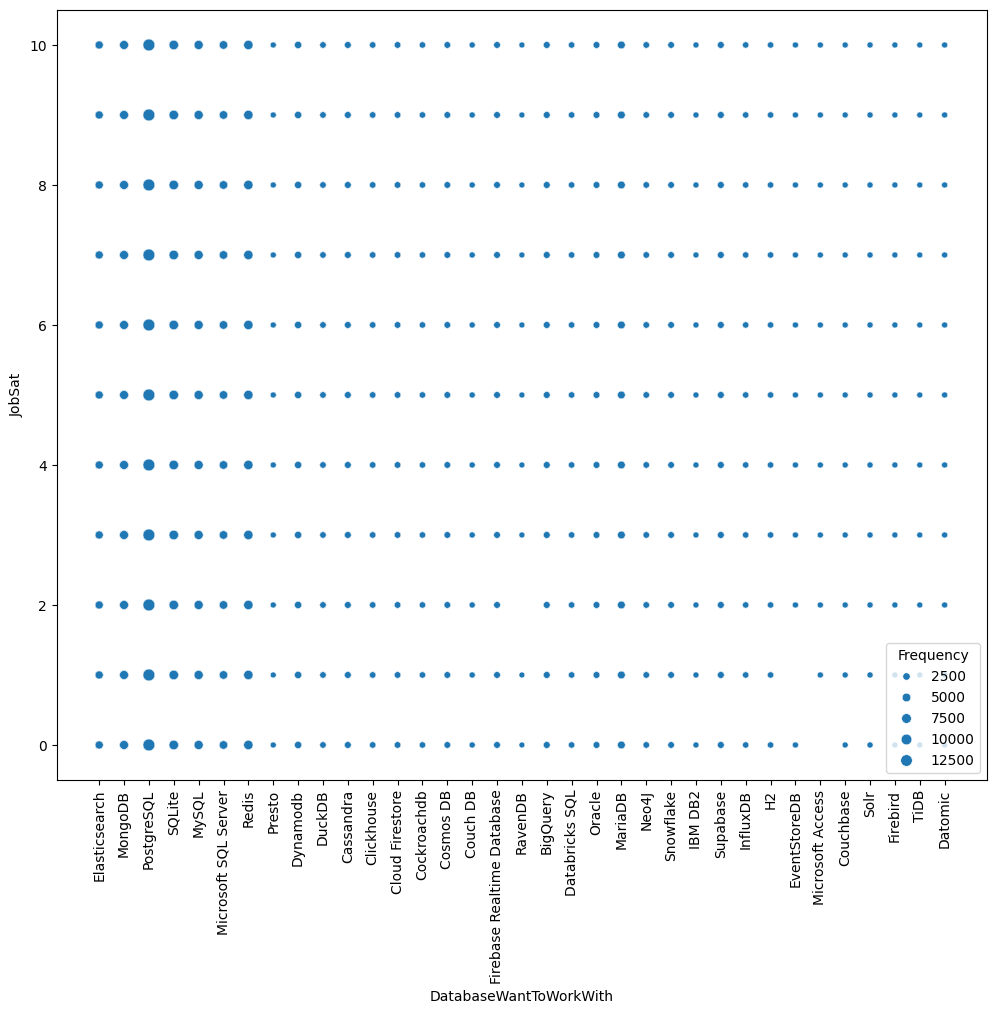

In [6]:
##Write your code here
#Create a copy of the dataframe to a new dataframe df_databases
df_databases=df[['DatabaseWantToWorkWith','JobSat']].copy()
#Drop NA values for Jobsat scores
df_databases=df_databases.dropna(subset='JobSat')
#From the list of Databases Want to Work With, Split the string separated by ';'
df_databases['DatabaseWantToWorkWith']=df_databases['DatabaseWantToWorkWith'].str.split(';')
#Store the split string into a new df, df_exploded
df_exploded=df_databases.explode('DatabaseWantToWorkWith')
#Get only the names of Database want to work with from the string using strip()
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()
#Calculate the count of respondents for each entry in to the DatabaseWant to work with
database_counts = df_exploded['DatabaseWantToWorkWith'].value_counts().rename('Frequency').reset_index()
#Rename the column
database_counts.rename(columns={'index': 'DatabaseWantToWorkWith'}, inplace=True)
#Create final Dataframe combining the count with the original df.
df_merged = pd.merge(df_exploded, database_counts, on='DatabaseWantToWorkWith', how='left')
plt.figure(figsize=(12,10))
#Plot a Bubble plot (Database Want to Work With vs JobSat, size= Count of respondents)
sns.scatterplot(data=df_merged,x='DatabaseWantToWorkWith',y='JobSat',size='Frequency')
plt.xticks(rotation=90)

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Developer, full-stack'),
  Text(1, 0, 'Developer Experience'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Academic researcher'),
  Text(4, 0, 'Project manager'),
  Text(5, 0, 'Developer Advocate'),
  Text(6, 0, 'Developer, back-end'),
  Text(7, 0, 'Other (please specify):'),
  Text(8, 0, 'Developer, front-end'),
  Text(9, 0, 'Database administrator'),
  Text(10, 0, 'Developer, desktop or enterprise applications'),
  Text(11, 0, 'Cloud infrastructure engineer'),
  Text(12, 0, 'Data scientist or machine learning specialist'),
  Text(13, 0, 'Research & Development role'),
  Text(14, 0, 'Developer, embedded applications or devices'),
  Text(15, 0, 'System administrator'),
  Text(16, 0, 'DevOps specialist'),
  Text(17, 0, 'Engineering manager'),
  Text(18, 0, 'Designer'),
  Text(19, 0, 'Se

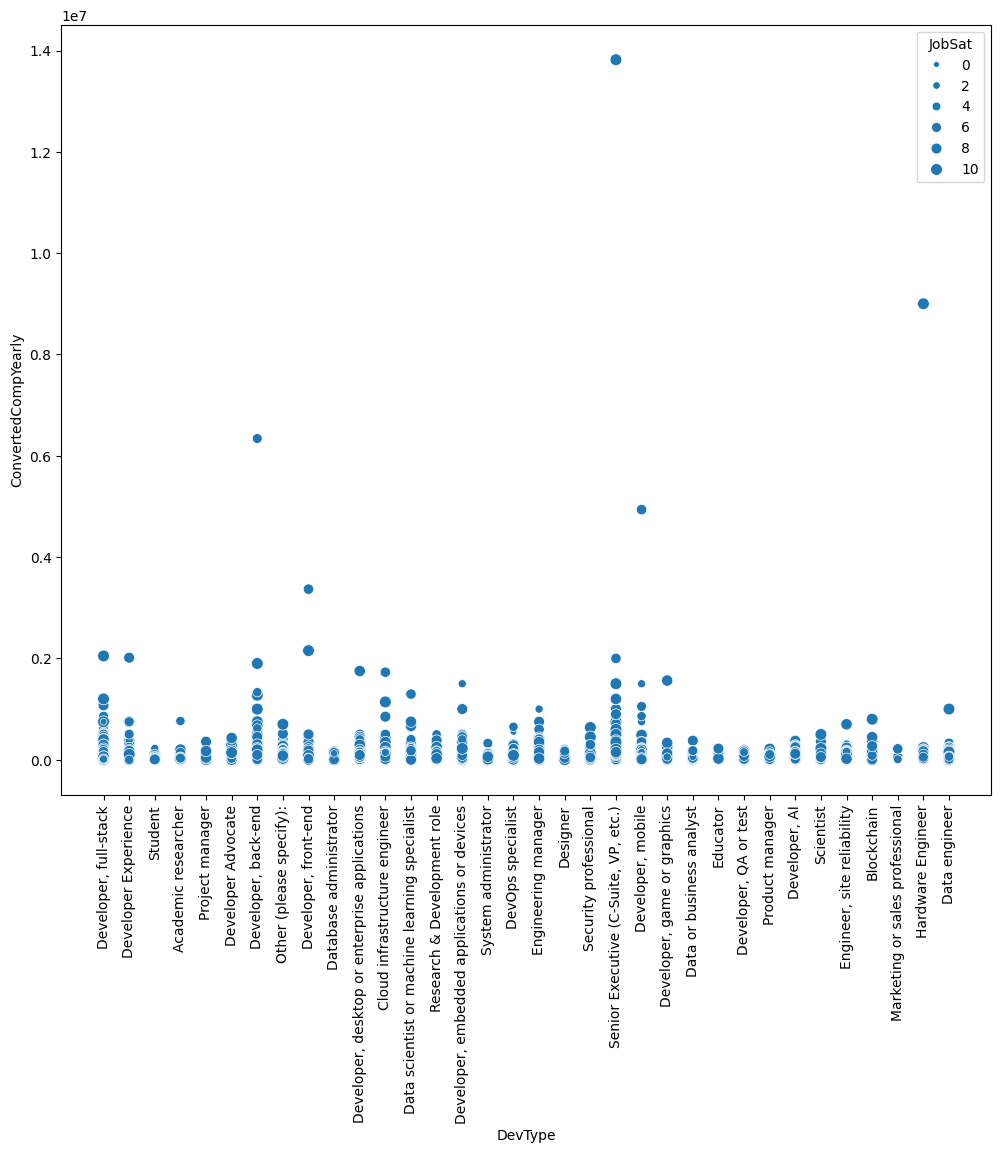

In [7]:
##Write your code here
df_Compensation=df[['ConvertedCompYearly','DevType','JobSat']].copy()
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_Compensation,x='DevType',y='ConvertedCompYearly',size='JobSat')
plt.xticks(rotation=90)

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'PyCharm'),
  Text(1, 0, 'Visual Studio Code'),
  Text(2, 0, 'WebStorm'),
  Text(3, 0, 'Visual Studio'),
  Text(4, 0, 'Vim'),
  Text(5, 0, 'Nano'),
  Text(6, 0, 'Xcode'),
  Text(7, 0, 'RStudio'),
  Text(8, 0, 'Android Studio'),
  Text(9, 0, 'IntelliJ IDEA'),
  Text(10, 0, 'Netbeans'),
  Text(11, 0, 'Notepad++'),
  Text(12, 0, 'Sublime Text'),
  Text(13, 0, 'Eclipse'),
  Text(14, 0, 'VSCodium'),
  Text(15, 0, 'Kate'),
  Text(16, 0, 'Jupyter Notebook/JupyterLab'),
  Text(17, 0, 'Rider'),
  Text(18, 0, 'Emacs'),
  Text(19, 0, 'Neovim'),
  Text(20, 0, 'DataGrip'),
  Text(21, 0, 'IPython'),
  Text(22, 0, 'RubyMine'),
  Text(23, 0, 'Geany'),
  Text(24, 0, 'Rad Studio (Delphi, C++ Builder)'),
  Text(25, 0, 'CLion'),
  Text(26, 0, 'Fleet'),
  Text(27, 0, 'Code::Blocks'),
  Text(28, 0

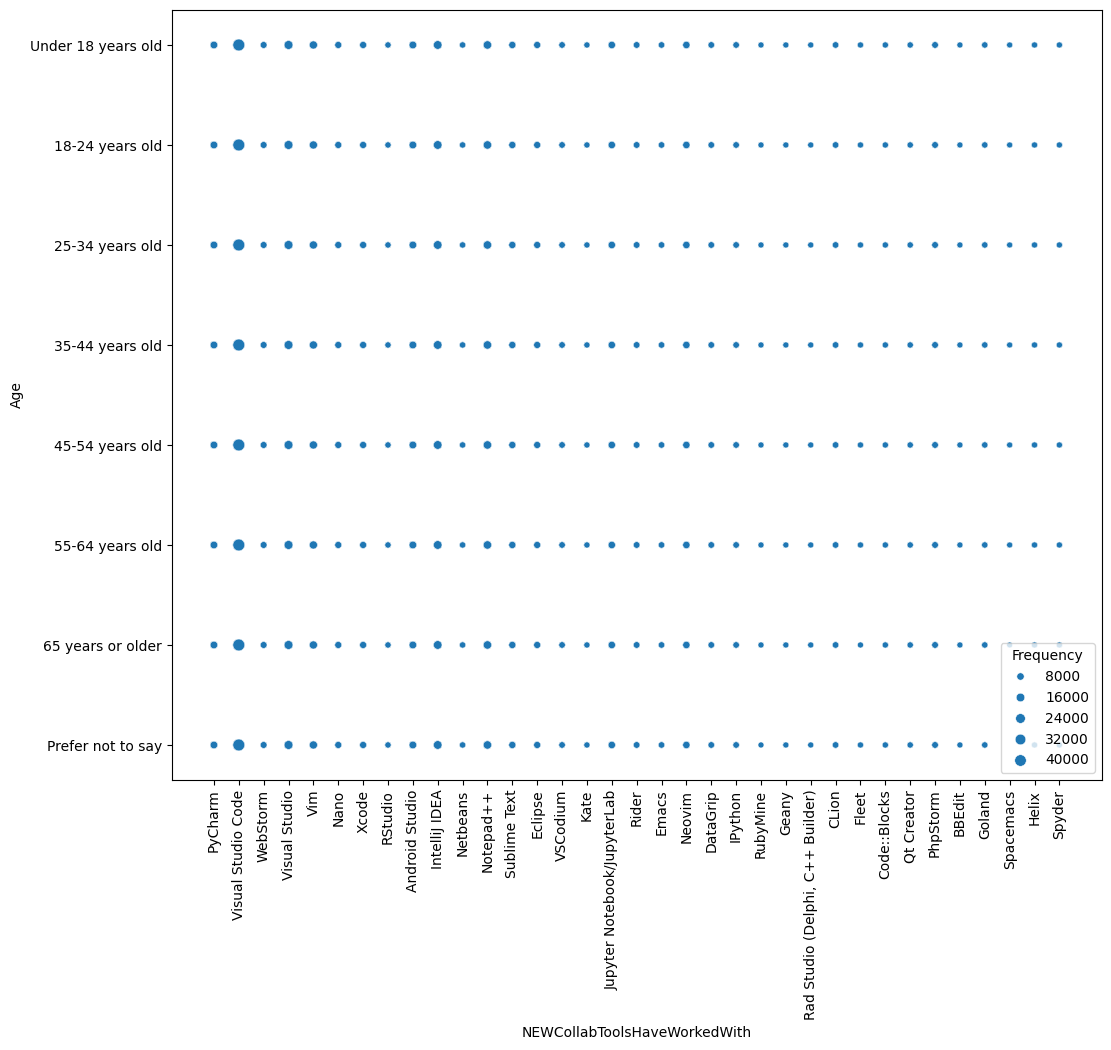

In [8]:
##Write your code here
#Create a copy of the dataframe to a new dataframe df_Collab
df_Collab=df[['NEWCollabToolsHaveWorkedWith','Age']].copy()
#From the list of NEWCollabToolsHaveWorkedWith, Split the string separated by ';'
df_Collab['NEWCollabToolsHaveWorkedWith']=df_Collab['NEWCollabToolsHaveWorkedWith'].str.split(';')
#Store the split string into a new df, df_exploded
df_exploded=df_Collab.explode('NEWCollabToolsHaveWorkedWith')
#Get only the names of NEWCollabToolsHaveWorkedWith from the string using strip()
df_exploded['NEWCollabToolsHaveWorkedWith'] = df_exploded['NEWCollabToolsHaveWorkedWith'].str.strip()
#Calculate the count of respondents for each entry in to the NEWCollabToolsHaveWorkedWith
collab_counts = df_exploded['NEWCollabToolsHaveWorkedWith'].value_counts().rename('Frequency').reset_index()
#Create final Dataframe combining the count with the original df.
df_merged = pd.merge(df_exploded, collab_counts, on='NEWCollabToolsHaveWorkedWith', how='left')
plt.figure(figsize=(12,10))
#Plot a Bubble plot (NEWCollabToolsHaveWorkedWith vs Age, size= Count of respondents)
sns.scatterplot(data=df_merged,x='NEWCollabToolsHaveWorkedWith',y='Age',size='Frequency')
plt.xticks(rotation=90)

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Express'),
  Text(1, 0, 'Htmx'),
  Text(2, 0, 'Node.js'),
  Text(3, 0, 'React'),
  Text(4, 0, 'Remix'),
  Text(5, 0, 'ASP.NET CORE'),
  Text(6, 0, 'jQuery'),
  Text(7, 0, 'Next.js'),
  Text(8, 0, 'Django'),
  Text(9, 0, 'Ruby on Rails'),
  Text(10, 0, 'ASP.NET'),
  Text(11, 0, 'Blazor'),
  Text(12, 0, 'Deno'),
  Text(13, 0, 'Solid.js'),
  Text(14, 0, 'Angular'),
  Text(15, 0, 'Laravel'),
  Text(16, 0, 'WordPress'),
  Text(17, 0, 'AngularJS'),
  Text(18, 0, 'Vue.js'),
  Text(19, 0, 'Flask'),
  Text(20, 0, 'CodeIgniter'),
  Text(21, 0, 'FastAPI'),
  Text(22, 0, 'Spring Boot'),
  Text(23, 0, 'Phoenix'),
  Text(24, 0, 'Svelte'),
  Text(25, 0, 'Astro'),
  Text(26, 0, 'Nuxt.js'),
  Text(27, 0, 'Fastify'),
  Text(28, 0, 'NestJS'),
  Text(29, 0, 'Symfony'),
  Text(30, 0, 'Drup

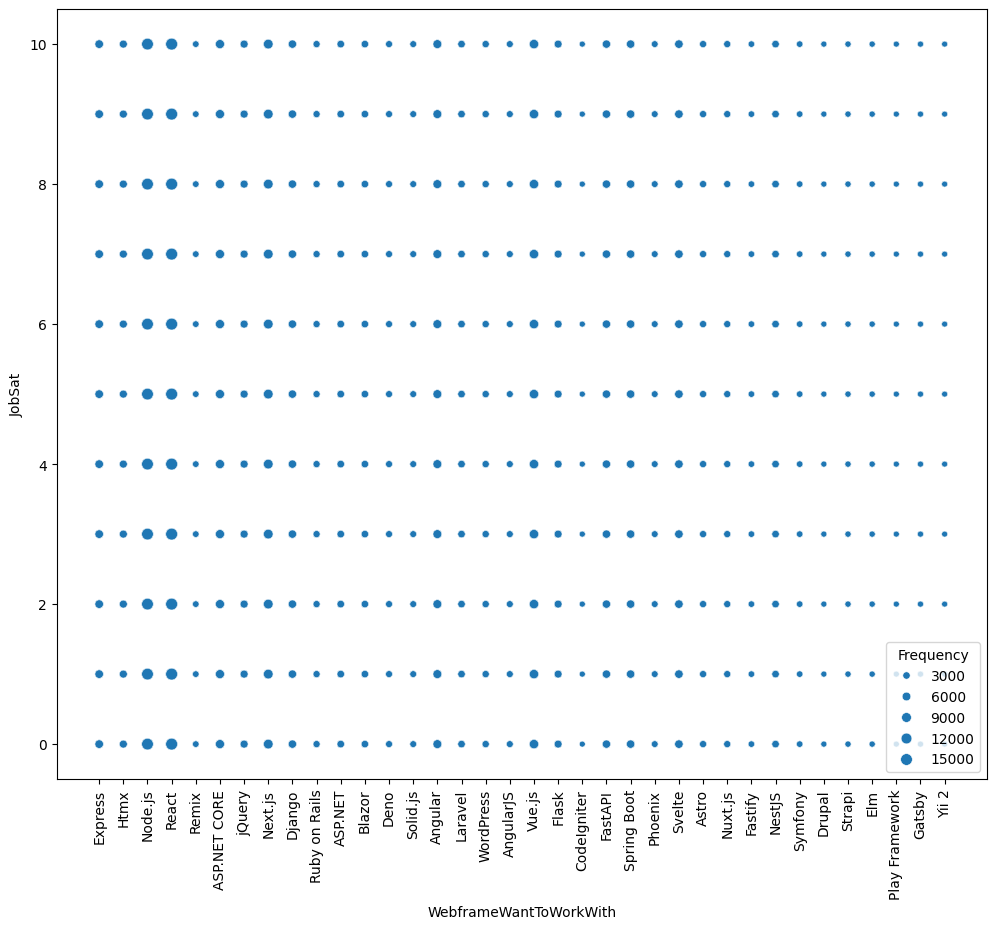

In [9]:
##Write your code here
##Write your code here
#Create a copy of the dataframe to a new dataframe df_WebFrame
df_WebFrame=df[['WebframeWantToWorkWith','JobSat']].copy()
#From the list of WebframeWantToWorkWith, Split the string separated by ';'
df_WebFrame['WebframeWantToWorkWith']=df_WebFrame['WebframeWantToWorkWith'].str.split(';')
#Store the split string into a new df, df_exploded
df_exploded=df_WebFrame.explode('WebframeWantToWorkWith')
#Get only the names of WebframeWantToWorkWith from the string using strip()
df_exploded['WebframeWantToWorkWith'] = df_exploded['WebframeWantToWorkWith'].str.strip()
#Calculate the count of respondents for each entry in to the WebframeWantToWorkWith
webframe_counts = df_exploded['WebframeWantToWorkWith'].value_counts().rename('Frequency').reset_index()
#Create final Dataframe combining the count with the original df.
df_merged = pd.merge(df_exploded, webframe_counts, on='WebframeWantToWorkWith', how='left')
plt.figure(figsize=(12,10))
#Plot a Bubble plot (WebframeWantToWorkWith vs JobSat, size= Count of respondents)
sns.scatterplot(data=df_merged,x='WebframeWantToWorkWith',y='JobSat',size='Frequency')
plt.xticks(rotation=90)

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

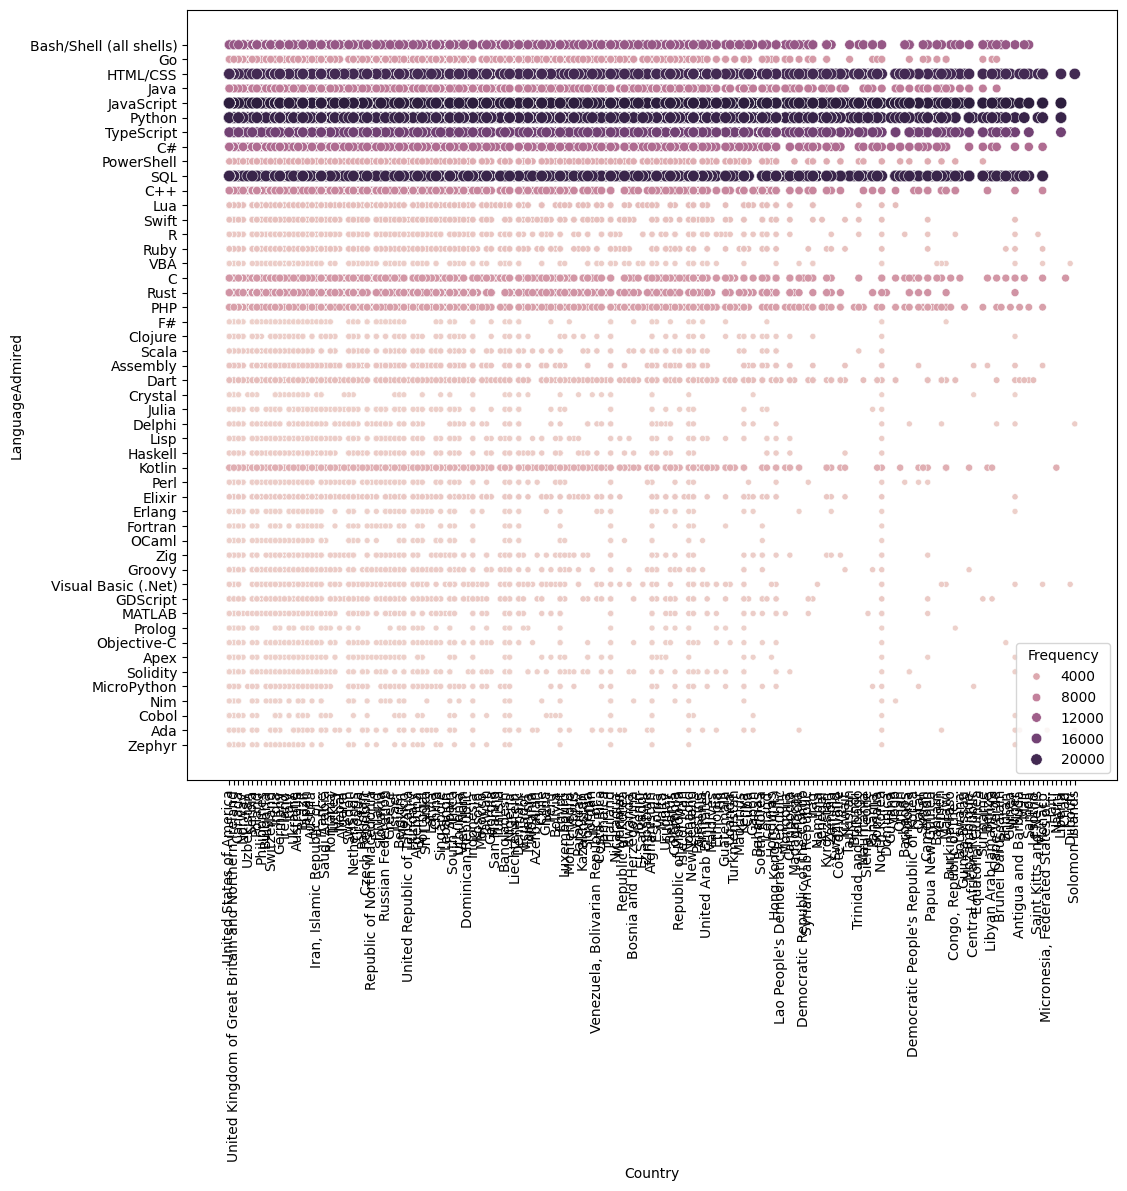

In [10]:
##Write your code here
#Create a copy of the dataframe to a new dataframe df_lang
df_lang=df[['LanguageAdmired','Country']].copy()
#From the list of LanguageAdmired, Split the string separated by ';'
df_lang['LanguageAdmired']=df_lang['LanguageAdmired'].str.split(';')
#Store the split string into a new df, df_exploded
df_exploded=df_lang.explode('LanguageAdmired')
#Get only the names of LanguageAdmired from the string using strip()
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip()
#Calculate the count of respondents for each entry in to the LanguageAdmired
lang_counts = df_exploded['LanguageAdmired'].value_counts().rename('Frequency').reset_index()
#Create final Dataframe combining the count with the original df.
df_merged = pd.merge(df_exploded, lang_counts, on='LanguageAdmired', how='left')
#df_merged=df_merged[df_merged['Frequency']>12000]
plt.figure(figsize=(12,10))
#Plot a Bubble plot (LanguageAdmired vs Country, size= Count of respondents)
sns.scatterplot(data=df_merged,x='Country',y='LanguageAdmired',size='Frequency',hue='Frequency')
plt.xticks(rotation=90)

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
